# Pitch Prediction Project
- all data used was downloaded from https://baseballsavant.mlb.com/

### Data Information: Pitcher
- last_name, first_name
- player_id
- year
- p_game = games pitched
- p_formatted_ip = innings pitched
- pitch_count_offspeed = offspeed pitch count
- pitch_count_fastball = fastball pitch count
- pitch_count_breaking = breaking ball pitch count
- pitch_hand = throwing hand: R - right; L - left
- 4 seam percentage
- slider percentage
- change up percentage
- curveball percentage
- sinker percentage
- cutter percentage
- splitter percentage
- knuckle percentage
- sweeper percentage
- slurve percentage
- forkball percentage
- screwball percentage
- fastball percentage
- breaking percentage
- offspeed percentage

### Import the Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [3]:
pitch_df = pd.read_csv('pitchStats.csv')
batter_df = pd.read_csv('batterStats.csv')
pitch = pitch_df.copy()
batter = batter_df.copy()

In [4]:
pitch.head()

,"last_name, first_name",player_id,year,p_game,p_formatted_ip,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_hand,n,...,n_fc_formatted,n_fs_formatted,n_kn_formatted,n_st_formatted,n_sv_formatted,n_fo_formatted,n_sc_formatted,n_fastball_formatted,n_breaking_formatted,n_offspeed_formatted
0,"Colon, Bartolo",112526,2015,33,194.2,198,2217,268,R,2683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.6,10.0,7.4
1,"Burnett, A.J.",150359,2015,26,164.0,219,1540,731,R,2490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.8,29.4,8.8
2,"Hudson, Tim",218596,2015,24,123.2,207,1426,215,R,1848,...,22.8,11.2,NaN,NaN,NaN,NaN,NaN,77.2,11.6,11.2
3,"Buehrle, Mark",279824,2015,32,198.2,595,1982,241,L,2818,...,19.5,NaN,NaN,NaN,NaN,NaN,NaN,70.3,8.6,21.1
4,"Sabathia, CC",282332,2015,29,167.1,376,1712,605,L,2693,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,63.6,22.5,14.0


In [5]:
pitch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106 entries, 0 to 1105
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   last_name, first_name  1106 non-null   object 
 1   player_id              1106 non-null   int64  
 2   year                   1106 non-null   int64  
 3   p_game                 1106 non-null   int64  
 4   p_formatted_ip         1106 non-null   float64
 5   pitch_count_offspeed   1106 non-null   int64  
 6   pitch_count_fastball   1106 non-null   int64  
 7   pitch_count_breaking   1106 non-null   int64  
 8   pitch_hand             1106 non-null   object 
 9   n                      1106 non-null   int64  
 10  n_ff_formatted         1069 non-null   float64
 11  n_sl_formatted         817 non-null    float64
 12  n_ch_formatted         988 non-null    float64
 13  n_cu_formatted         954 non-null    float64
 14  n_si_formatted         918 non-null    float64
 15  n_fc

In [6]:
pitch.shape

(1106, 25)

In [7]:
pitch.isnull().sum()

last_name, first_name       0
player_id                   0
year                        0
p_game                      0
p_formatted_ip              0
pitch_count_offspeed        0
pitch_count_fastball        0
pitch_count_breaking        0
pitch_hand                  0
n                           0
n_ff_formatted             37
n_sl_formatted            289
n_ch_formatted            118
n_cu_formatted            152
n_si_formatted            188
n_fc_formatted            589
n_fs_formatted            966
n_kn_formatted           1099
n_st_formatted            963
n_sv_formatted           1078
n_fo_formatted           1105
n_sc_formatted           1104
n_fastball_formatted        0
n_breaking_formatted        0
n_offspeed_formatted       20
dtype: int64

In [8]:
pitch_columns = [
    "n_ff_formatted", "n_sl_formatted", "n_ch_formatted", "n_cu_formatted",
    "n_si_formatted", "n_fc_formatted", "n_fs_formatted", "n_st_formatted", "n_kn_formatted", "n_sv_formatted", "n_fo_formatted", "n_sc_formatted" 
]
pitch[pitch_columns] = pitch[pitch_columns].fillna(0)

In [9]:
pitch = pitch.rename(columns={'n_ff_formatted': 'ff_percent',
                              'n_sl_formatted': 'sl_percent',
                              'n_ch_formatted': 'ch_percent',
                              'n_cu_formatted': 'cu_percent',
                              'n_si_formatted': 'si_percent',
                              'n_fc_formatted': 'fc_percent',
                              'n_fs_formatted': 'fs_percent',
                              'n_kn_formatted': 'kn_percent',
                              'n_st_formatted': 'st_percent',
                              'n_sv_formatted': 'sv_percent',
                              'n_fo_formatted': 'fo_percent',
                              'n_sc_formatted': 'sc_percent'})

In [10]:
pitch.isnull().sum()

last_name, first_name     0
player_id                 0
year                      0
p_game                    0
p_formatted_ip            0
pitch_count_offspeed      0
pitch_count_fastball      0
pitch_count_breaking      0
pitch_hand                0
n                         0
ff_percent                0
sl_percent                0
ch_percent                0
cu_percent                0
si_percent                0
fc_percent                0
fs_percent                0
kn_percent                0
st_percent                0
sv_percent                0
fo_percent                0
sc_percent                0
n_fastball_formatted      0
n_breaking_formatted      0
n_offspeed_formatted     20
dtype: int64

In [11]:
pitch[pitch['last_name, first_name'] == 'Cortes Jr., Nestor']

,"last_name, first_name",player_id,year,p_game,p_formatted_ip,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_hand,n,...,fc_percent,fs_percent,kn_percent,st_percent,sv_percent,fo_percent,sc_percent,n_fastball_formatted,n_breaking_formatted,n_offspeed_formatted
856,"Cortes Jr., Nestor",641482,2022,28,158.1,108,1891,7,L,2465,...,29.8,0.0,0.0,18.6,0.0,0.0,0.0,76.7,18.9,4.4
1043,"Cortes Jr., Nestor",641482,2024,31,174.1,275,2098,25,L,2849,...,28.0,0.0,0.0,15.8,0.0,0.0,0.0,73.6,16.7,9.7


In [12]:
pitch[pitch['last_name, first_name'] == 'Snell, Blake']

,"last_name, first_name",player_id,year,p_game,p_formatted_ip,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_hand,n,...,fc_percent,fs_percent,kn_percent,st_percent,sv_percent,fo_percent,sc_percent,n_fastball_formatted,n_breaking_formatted,n_offspeed_formatted
345,"Snell, Blake",605483,2017,24,129.1,481,1252,542,L,2275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,23.8,21.1
456,"Snell, Blake",605483,2018,31,180.2,559,1500,854,L,2913,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.5,29.3,19.2
647,"Snell, Blake",605483,2020,11,50.0,170,444,258,L,872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.9,29.6,19.5
744,"Snell, Blake",605483,2021,27,128.2,231,1233,883,L,2347,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.5,37.6,9.8
834,"Snell, Blake",605483,2022,24,128.0,118,1300,923,L,2341,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.5,39.4,5.0
937,"Snell, Blake",605483,2023,32,180.0,584,1541,1043,L,3168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.6,32.9,18.4


In [13]:
batter.head()

,"last_name, first_name",player_id,year,ab,hit,single,double,triple,home_run,r_run,b_total_ball,b_total_strike,b_total_swinging_strike,b_total_pitches,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_count
0,"Hunter, Torii",116338,2015,521,125,81,22,0,22,67,691,1392,840,2087,270,1328,469,2087
1,"Ortiz, David",120074,2015,528,144,70,37,0,37,73,1021,1451,757,2488,366,1425,565,2488
2,"Rodriguez, Alex",121347,2015,523,131,75,22,1,33,83,1009,1478,666,2503,283,1539,615,2503
3,"Ramirez, Aramis",133380,2015,475,117,68,31,1,17,43,617,1198,859,1815,154,1164,480,1815
4,"Beltré, Adrian",134181,2015,567,163,109,32,4,18,83,783,1493,863,2288,292,1452,515,2288


In [14]:
batter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375 entries, 0 to 1374
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   last_name, first_name    1375 non-null   object
 1   player_id                1375 non-null   int64 
 2   year                     1375 non-null   int64 
 3   ab                       1375 non-null   int64 
 4   hit                      1375 non-null   int64 
 5   single                   1375 non-null   int64 
 6   double                   1375 non-null   int64 
 7   triple                   1375 non-null   int64 
 8   home_run                 1375 non-null   int64 
 9   r_run                    1375 non-null   int64 
 10  b_total_ball             1375 non-null   int64 
 11  b_total_strike           1375 non-null   int64 
 12  b_total_swinging_strike  1375 non-null   int64 
 13  b_total_pitches          1375 non-null   int64 
 14  pitch_count_offspeed     1375 non-null  

In [15]:
batter.shape

(1375, 18)

In [16]:
batter[batter['last_name, first_name'] == 'Ortiz, David']

,"last_name, first_name",player_id,year,ab,hit,single,double,triple,home_run,r_run,b_total_ball,b_total_strike,b_total_swinging_strike,b_total_pitches,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_count
1,"Ortiz, David",120074,2015,528,144,70,37,0,37,73,1021,1451,757,2488,366,1425,565,2488
142,"Ortiz, David",120074,2016,537,169,82,48,1,38,79,1018,1420,615,2478,342,1447,593,2479


In [17]:
batter[batter['last_name, first_name'] == 'Bregman, Alex']

,"last_name, first_name",player_id,year,ab,hit,single,double,triple,home_run,r_run,b_total_ball,b_total_strike,b_total_swinging_strike,b_total_pitches,pitch_count_offspeed,pitch_count_fastball,pitch_count_breaking,pitch_count
419,"Bregman, Alex",608324,2017,556,158,95,39,5,19,88,869,1409,588,2302,221,1334,710,2302
551,"Bregman, Alex",608324,2018,594,170,87,51,1,31,105,1183,1631,289,2821,309,1702,783,2821
672,"Bregman, Alex",608324,2019,554,164,84,37,2,41,122,1298,1603,441,2915,389,1668,775,2915
1039,"Bregman, Alex",608324,2022,548,142,81,38,0,23,93,1084,1437,133,2521,282,1449,652,2521
1152,"Bregman, Alex",608324,2023,622,163,106,28,4,25,103,1165,1624,127,2789,289,1592,725,2789
1273,"Bregman, Alex",608324,2024,581,151,93,30,2,26,79,867,1526,112,2393,249,1434,542,2393


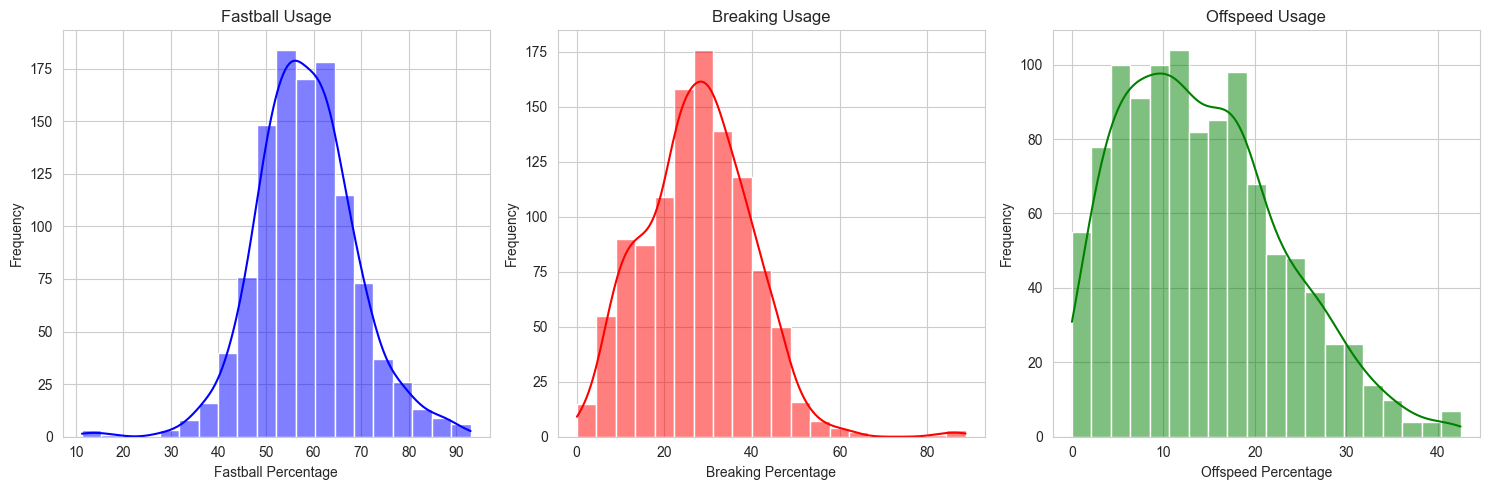

In [18]:
# Set the plot style
sns.set_style('whitegrid')

# Create histograms for fastball, breaking, and offpoeed pitches
plt.figure(figsize=(15, 5))

# Fastball percentage
plt.subplot(1, 3, 1)
sns.histplot(pitch["n_fastball_formatted"], bins=20, kde=True, color="blue")
plt.xlabel("Fastball Percentage")
plt.ylabel("Frequency")
plt.title("Fastball Usage")

# Breakingball percentage
plt.subplot(1, 3, 2)
sns.histplot(pitch["n_breaking_formatted"], bins=20, kde=True, color="red")
plt.xlabel("Breaking Percentage")
plt.ylabel("Frequency")
plt.title("Breaking Usage")

# Offspeed percentage
plt.subplot(1, 3, 3)
sns.histplot(pitch["n_offspeed_formatted"], bins=20, kde=True, color="green")
plt.xlabel("Offspeed Percentage")
plt.ylabel("Frequency")
plt.title("Offspeed Usage")

# Showing the plots
plt.tight_layout()
plt.show()